In [1]:
##Brainstorming of work for argopy Task 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import argopy

In [4]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader

<datafetcher> 'Not initialised'
Current backend: erddap
Available fetchers: profile, float, region
User mode: standard

In [5]:
ds = argo_loader.float(6902754).to_xarray()
print(ds)

<xarray.Dataset>
Dimensions:                (N_POINTS: 14211)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 14207 14208 14209 14210
    LATITUDE               (N_POINTS) float64 58.98 58.98 58.98 ... 49.18 49.18
    LONGITUDE              (N_POINTS) float64 -32.05 -32.05 ... -47.99 -47.99
    TIME                   (N_POINTS) datetime64[ns] 2017-11-16T03:55:00 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 ... 131 131 131 131 131
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 6902754 6902754 ... 6902754 6902754
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 

In [6]:
df = ds.to_dataframe()

In [7]:
df

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
N_POINTS,,,,,,,,,,,,,,,,
0,1,1,D,A,6902754,1,5.0,1,34.688000,1,6.768,1,1,58.983,-32.052,2017-11-16 03:55:00
1,1,1,D,A,6902754,1,8.0,1,34.688000,1,6.776,1,1,58.983,-32.052,2017-11-16 03:55:00
2,1,1,D,A,6902754,1,10.0,1,34.688000,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
3,1,1,D,A,6902754,1,16.0,1,34.688000,1,6.774,1,1,58.983,-32.052,2017-11-16 03:55:00
4,1,1,D,A,6902754,1,26.0,1,34.688000,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,2,131,A,A,6902754,1,1913.0,1,34.916000,1,2.852,1,1,49.181,-47.986,2021-06-08 00:51:00
14207,2,131,A,A,6902754,1,1938.0,1,34.916000,1,2.831,1,1,49.181,-47.986,2021-06-08 00:51:00
14208,2,131,A,A,6902754,1,1963.0,1,34.916000,1,2.813,1,1,49.181,-47.986,2021-06-08 00:51:00


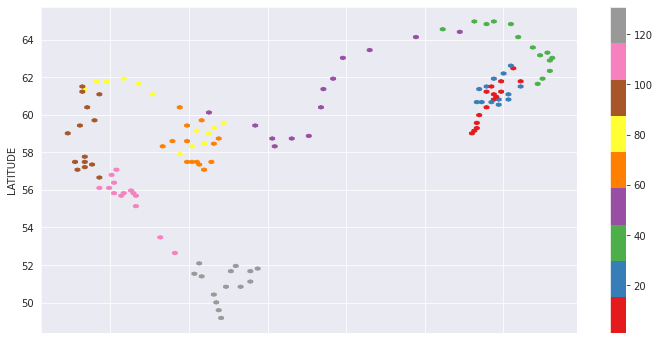

In [8]:
df.plot.hexbin(x='LONGITUDE', y='LATITUDE', C='CYCLE_NUMBER' , cmap='Set1',figsize = (12,6))
plt.grid()
plt.show()

In [44]:
import geopandas as gpd

In [45]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


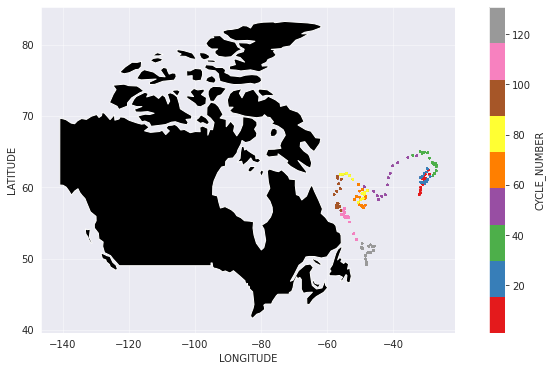

In [46]:
# Start the plot
fig, ax = plt.subplots(figsize=(12,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Canada"].plot(color="black",
                                                 ax=ax)

# plot points
df.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", 
        c="CYCLE_NUMBER", colormap="Set1", s=1,
        ax=ax)
# add grid
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

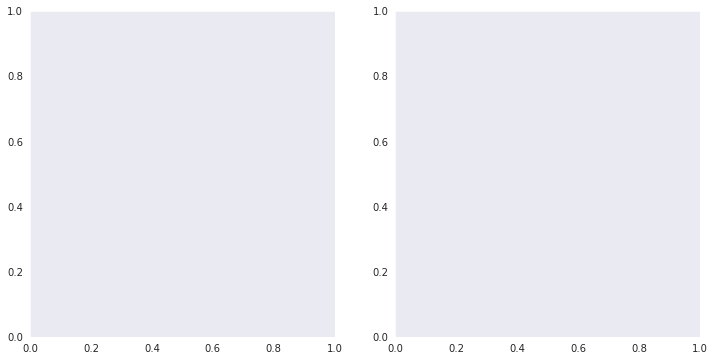

In [53]:
# Start the Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Canada"].plot(ax=ax[0,0],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[0,1],color="black",
                                                )

# plot points
#df.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
#ax[0, 0].set_title("2001 Argo Floats")
                                                                
#df.plot(ax=ax[0,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="TIME", colormap="Set1", s=1)
                                                                
                                                                
# add grid
# add grid
#ax[0,0].grid(b=True, alpha=0.5)
#ax[0,1].grid(b=True, alpha=0.5)
plt.show()

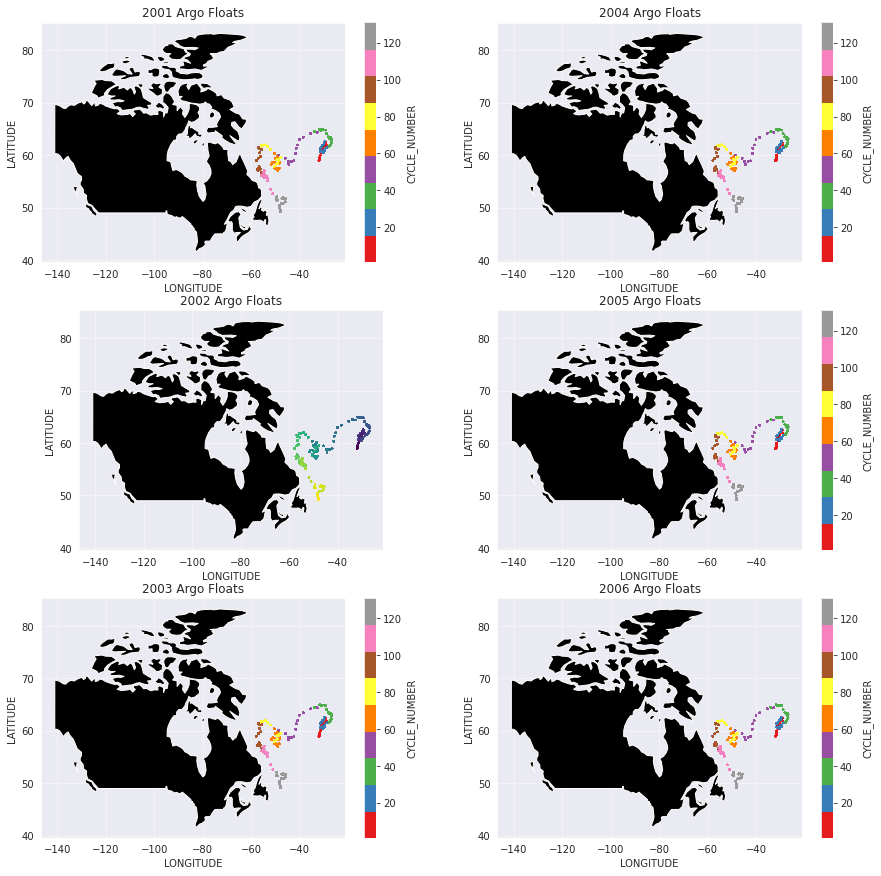

In [58]:
# Start the plot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Canada"].plot(ax=ax[0,0],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[1,0],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[2,0],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[0,1],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[1,1],color="black",
                                                )
countries[countries["name"] == "Canada"].plot(ax=ax[2,1],color="black",
                                                )
# parse dates for plot's title
#first_month = df["acq_date"].min().strftime("%b %Y")
#last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
ax[0, 0].set_title("2001 Argo Floats")
df.plot(ax=ax[1,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="TIME", colormap="viridis", s=1)
ax[1, 0].set_title("2002 Argo Floats")
df.plot(ax=ax[2,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
ax[2, 0].set_title("2003 Argo Floats")
df.plot(ax=ax[0,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
ax[0, 1].set_title("2004 Argo Floats")
df.plot(ax=ax[1,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
ax[1, 1].set_title("2005 Argo Floats")
df.plot(ax=ax[2,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
ax[2, 1].set_title("2006 Argo Floats")
# add grid
# add grid
ax[0, 0].grid(b=True, alpha=0.5)
ax[1, 0].grid(b=True, alpha=0.5)
ax[2, 0].grid(b=True, alpha=0.5)
ax[0, 1].grid(b=True, alpha=0.5)
ax[1, 1].grid(b=True, alpha=0.5)
ax[2, 1].grid(b=True, alpha=0.5)
#ax.grid(b=True, alpha=0.5)
#fig.tight_layout()
plt.show()

In [63]:
df.insert(0, 'Levels', range(len(df)))
df

,Levels,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
N_POINTS,,,,,,,,,,,,,,,,,
0,0,1,1,D,A,6902754,1,5.0,1,34.688000,1,6.768,1,1,58.983,-32.052,2017-11-16 03:55:00
1,1,1,1,D,A,6902754,1,8.0,1,34.688000,1,6.776,1,1,58.983,-32.052,2017-11-16 03:55:00
2,2,1,1,D,A,6902754,1,10.0,1,34.688000,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
3,3,1,1,D,A,6902754,1,16.0,1,34.688000,1,6.774,1,1,58.983,-32.052,2017-11-16 03:55:00
4,4,1,1,D,A,6902754,1,26.0,1,34.688000,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,14206,2,131,A,A,6902754,1,1913.0,1,34.916000,1,2.852,1,1,49.181,-47.986,2021-06-08 00:51:00
14207,14207,2,131,A,A,6902754,1,1938.0,1,34.916000,1,2.831,1,1,49.181,-47.986,2021-06-08 00:51:00
14208,14208,2,131,A,A,6902754,1,1963.0,1,34.916000,1,2.813,1,1,49.181,-47.986,2021-06-08 00:51:00


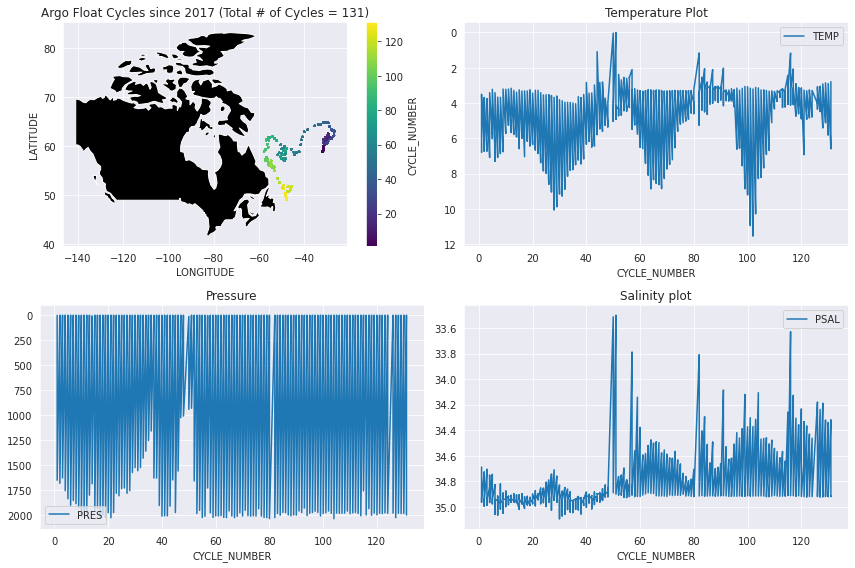

In [102]:
# Start the plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Canada"].plot(ax=ax[0,0],color="black",
                                                )
#countries[countries["name"] == "Canada"].plot(ax=ax[0,1],color="black",
                                                #)
#countries[countries["name"] == "Canada"].plot(ax=ax[2,0],color="black",
                                            #    )
#countries[countries["name"] == "Canada"].plot(ax=ax[0,1],color="black",
                                                #)
#countries[countries["name"] == "Canada"].plot(ax=ax[1,0],color="black",
                                               # )
#countries[countries["name"] == "Canada"].plot(ax=ax[1,1],color="black",
                                                #)

# plot points
df.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="viridis", s=1)
ax[0, 0].set_title("Argo Float Cycles since 2017 (Total # of Cycles = 131)")
df.plot(ax=ax[1,0], x="CYCLE_NUMBER", y="PRES")
ax[1, 0].set_title("Pressure")
ax[1, 0].invert_yaxis()
df.plot(ax=ax[0,1], x="CYCLE_NUMBER", y="TEMP")
ax[0, 1].set_title("Temperature Plot")
ax[0, 1].invert_yaxis()
df.plot(ax=ax[1,1], x="CYCLE_NUMBER", y="PSAL")
ax[1, 1].set_title("Salinity plot")
ax[1, 1].invert_yaxis()
#df.plot(ax=ax[0,1], x="TIME", y="TEMP")
#ax[0, 1].set_title("Temperature Plot")
#df.plot(ax=ax[2,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="Set1", s=1)
#ax[2, 1].set_title("2006 Argo Floats")
# add grid
# add grid
ax[0, 0].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 1].grid()
#ax[1, 0].grid(b=True, alpha=0.5)
#ax[2, 0].grid(b=True, alpha=0.5)
#ax[1,0].grid(b=True, alpha=0.5)
#ax[1, 1].grid(b=True, alpha=0.5)
#ax[2, 1].grid(b=True, alpha=0.5)
#ax.grid(b=True, alpha=0.5)
fig.tight_layout()
plt.show()